We will be using a linear regression model to demonstrate the relation between the increase in the forest cover area and the improvement in the weather conditions.
As a first step, we will be importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Reading the 'Datasets for hackathon.csv' file to the program. the csv file is the combination of the datasets available in the official website of the Telangana Government: https://data.telangana.gov.in/about-open-data-telangana
The csv file has been uploaded to the notebook from the computer system.

In [2]:
data_frame = pd.read_csv('/content/Forest_and_weather_dataset.csv')

data_frame.columns

Index(['Districts', 'Forest Cover (Sq. Kms.)', 'Percentage of Forest Cover',
       'Site Registered', 'Plants Planted', 'Sites geo referenced',
       'Plants Geo referenced', 'Small', 'Medium', 'Large', 'rain', 'temp_min',
       'temp_max', 'humidity_min', 'humidity_max', 'wind_speed_max',
       'wind_speed_min'],
      dtype='object')

Taking into consideration the required attributes and discarding the rest.

In [3]:
subset_data_frame = data_frame[['Districts', 'Forest Cover (Sq. Kms.)', 'Percentage of Forest Cover',
       'Site Registered', 'Plants Planted', 'Small', 'Medium', 'Large', 'rain', 'temp_min',
       'temp_max', 'humidity_min', 'humidity_max', 'wind_speed_max',
       'wind_speed_min']]

subset_data_frame

,Districts,Forest Cover (Sq. Kms.),Percentage of Forest Cover,Site Registered,Plants Planted,Small,Medium,Large,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
0,ADILABAD,1706.89,41.10,11393,8482542,44643,7611,535,8.309420,24.45112,31.84502,71.71425,95.93466,5.021768,0.162378
1,BHADRADRI,4286.98,57.29,9773,8431407,32202,4750,573,14.851040,25.60821,33.45448,76.32950,99.00603,7.241760,0.051984
2,HYDERABAD,1.43,0.66,927,1388317,0,0,0,7.052038,24.04925,30.85627,66.81779,91.26463,9.010122,0.425136
3,JAGTIAL,554.91,22.94,15335,14715535,33610,4141,305,8.601812,24.79223,32.43263,74.75911,98.32630,6.828165,0.170200
4,JANGAON,30.75,1.41,15873,7854454,35348,5459,406,10.516300,24.45572,32.47911,73.34530,97.84280,6.605974,0.111765
5,JAYASHANKAR,4505.05,72.96,8225,7980705,38719,3353,330,13.721740,25.45287,32.82864,73.94728,96.84977,11.029070,0.177744
6,JOGULAMBA,6.79,0.23,8805,2005325,39038,6026,620,8.164312,23.90772,31.04146,70.54007,94.11020,8.095372,0.248367
7,KAMAREDDY,868.99,23.79,26920,12878405,55496,3432,230,9.769516,23.55197,31.23442,75.01890,97.30870,8.155671,0.395542
8,KARIMNAGAR,3.47,0.16,9928,3954566,34191,3045,219,11.390620,24.77827,32.30476,75.65875,97.25176,10.380910,0.267867
9,KHAMMAM,621.89,14.26,12753,19237968,58241,8381,527,9.802795,25.81905,33.67964,74.60806,98.04504,7.458234,0.092935


One hot encoding of the district names for readability and easy implementation

In [4]:
one_hot_encoded = pd.get_dummies(subset_data_frame['Districts'])

print(one_hot_encoded)

subset_data_frame = subset_data_frame.join(one_hot_encoded)

subset_data_frame

subset_data_frame = subset_data_frame.drop('Districts', axis=1)
subset_data_frame

    ADILABAD  BHADRADRI  HYDERABAD  JAGTIAL  JANGAON  JAYASHANKAR  JOGULAMBA  \
0       True      False      False    False    False        False      False   
1      False       True      False    False    False        False      False   
2      False      False       True    False    False        False      False   
3      False      False      False     True    False        False      False   
4      False      False      False    False     True        False      False   
5      False      False      False    False    False         True      False   
6      False      False      False    False    False        False       True   
7      False      False      False    False    False        False      False   
8      False      False      False    False    False        False      False   
9      False      False      False    False    False        False      False   
10     False      False      False    False    False        False      False   
11     False      False      False    Fa

,Forest Cover (Sq. Kms.),Percentage of Forest Cover,Site Registered,Plants Planted,Small,Medium,Large,rain,temp_min,temp_max,...,RAJANNA,RANGAREDDY,SANGAREDDY,SIDDIPET,SURYAPET,VIKARABAD,WANAPARTHY,WARANGAL (R),WARANGAL (U),YADADRI
0,1706.89,41.10,11393,8482542,44643,7611,535,8.309420,24.45112,31.84502,...,False,False,False,False,False,False,False,False,False,False
1,4286.98,57.29,9773,8431407,32202,4750,573,14.851040,25.60821,33.45448,...,False,False,False,False,False,False,False,False,False,False
2,1.43,0.66,927,1388317,0,0,0,7.052038,24.04925,30.85627,...,False,False,False,False,False,False,False,False,False,False
3,554.91,22.94,15335,14715535,33610,4141,305,8.601812,24.79223,32.43263,...,False,False,False,False,False,False,False,False,False,False
4,30.75,1.41,15873,7854454,35348,5459,406,10.516300,24.45572,32.47911,...,False,False,False,False,False,False,False,False,False,False
5,4505.05,72.96,8225,7980705,38719,3353,330,13.721740,25.45287,32.82864,...,False,False,False,False,False,False,False,False,False,False
6,6.79,0.23,8805,2005325,39038,6026,620,8.164312,23.90772,31.04146,...,False,False,False,False,False,False,False,False,False,False
7,868.99,23.79,26920,12878405,55496,3432,230,9.769516,23.55197,31.23442,...,False,False,False,False,False,False,False,False,False,False
8,3.47,0.16,9928,3954566,34191,3045,219,11.390620,24.77827,32.30476,...,False,False,False,False,False,False,False,False,False,False
9,621.89,14.26,12753,19237968,58241,8381,527,9.802795,25.81905,33.67964,...,False,False,False,False,False,False,False,False,False,False


Seperating the attributes for the data and result parameters.

In [5]:
data_column = ['Forest Cover (Sq. Kms.)', 'Percentage of Forest Cover',  'Plants Planted', 'Site Registered', 'Small', 'Medium', 'Large']
result_column =['rain', 'temp_min', 'temp_max', 'humidity_min', 'humidity_max', 'wind_speed_max', 'wind_speed_min']

In the below code cell, we assign these parameters for our training data set

In [6]:
X_train, Y_train = (subset_data_frame[data_column], subset_data_frame[result_column])

Applying the linear regression model on the training set

In [7]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

print(regression.intercept_)
print(regression.coef_)

[10.42298515 24.43723294 31.68864333 71.52872971 94.76349322  8.63590428
  0.16202836]
[[ 1.84469717e-03 -6.94115409e-02  1.48590565e-08  8.68682466e-05
  -1.39606359e-05 -5.39200028e-04  2.12045850e-03]
 [-1.15119998e-05  1.94912539e-02  4.61814639e-08 -5.03547819e-05
  -1.65770378e-05  3.12429106e-04 -2.22214138e-03]
 [-4.48437736e-05  2.15153023e-02  7.24979971e-08 -4.36463763e-05
  -1.66604484e-05  3.35390414e-04 -2.58117250e-03]
 [ 4.39912068e-04 -1.38137710e-03  1.36495570e-08  1.04214372e-04
   8.94755610e-05 -8.51261773e-04  1.85951605e-03]
 [ 5.17412201e-05  1.52986784e-02  9.27535722e-08  5.63947001e-05
   2.63734907e-05 -2.97618735e-04  8.06945490e-04]
 [ 1.10079320e-03 -6.37618993e-02 -9.39290135e-08 -4.80634104e-05
   5.94353462e-05 -3.95065529e-04  2.37920838e-03]
 [ 1.20213059e-04 -9.06981178e-03  5.81476497e-10 -5.56031875e-07
   4.08705515e-06 -3.95333890e-05  5.16699633e-04]]


In [8]:
y_pred = regression.predict(X_train)

#print(y_pred)


Now, we apply the above linear regression model on the test dataset developed considering the increase in the Forest Cover (Sq. Kms.), Percentage of Forest Cover, Plants Planted, Site Registered by 10%. Through this we want to find the relationship between the forest and the improved climatic conditions in each district of the Telangana state.

In [9]:
test_data_set = pd.read_csv('/content/Increased_forest_and_weather_dataset.csv')

test_data_set.columns

Index(['Districts', 'Forest Cover (Sq. Kms.)', 'Percentage of Forest cover ',
       'Site Registered ', 'plants planted ', 'Small', 'Medium', 'Large'],
      dtype='object')

In [10]:
subset_test_data_frame = data_frame[['Districts', 'Forest Cover (Sq. Kms.)', 'Percentage of Forest Cover',
       'Site Registered', 'Plants Planted', 'Small', 'Medium', 'Large']]

subset_test_data_frame

,Districts,Forest Cover (Sq. Kms.),Percentage of Forest Cover,Site Registered,Plants Planted,Small,Medium,Large
0,ADILABAD,1706.89,41.10,11393,8482542,44643,7611,535
1,BHADRADRI,4286.98,57.29,9773,8431407,32202,4750,573
2,HYDERABAD,1.43,0.66,927,1388317,0,0,0
3,JAGTIAL,554.91,22.94,15335,14715535,33610,4141,305
4,JANGAON,30.75,1.41,15873,7854454,35348,5459,406
5,JAYASHANKAR,4505.05,72.96,8225,7980705,38719,3353,330
6,JOGULAMBA,6.79,0.23,8805,2005325,39038,6026,620
7,KAMAREDDY,868.99,23.79,26920,12878405,55496,3432,230
8,KARIMNAGAR,3.47,0.16,9928,3954566,34191,3045,219
9,KHAMMAM,621.89,14.26,12753,19237968,58241,8381,527


In [11]:
one_hot_encoded = pd.get_dummies(subset_test_data_frame['Districts'])

print(one_hot_encoded)

subset_test_data_frame = subset_test_data_frame.join(one_hot_encoded)

subset_test_data_frame

subset_test_data_frame = subset_test_data_frame.drop('Districts', axis=1)
subset_test_data_frame

    ADILABAD  BHADRADRI  HYDERABAD  JAGTIAL  JANGAON  JAYASHANKAR  JOGULAMBA  \
0       True      False      False    False    False        False      False   
1      False       True      False    False    False        False      False   
2      False      False       True    False    False        False      False   
3      False      False      False     True    False        False      False   
4      False      False      False    False     True        False      False   
5      False      False      False    False    False         True      False   
6      False      False      False    False    False        False       True   
7      False      False      False    False    False        False      False   
8      False      False      False    False    False        False      False   
9      False      False      False    False    False        False      False   
10     False      False      False    False    False        False      False   
11     False      False      False    Fa

,Forest Cover (Sq. Kms.),Percentage of Forest Cover,Site Registered,Plants Planted,Small,Medium,Large,ADILABAD,BHADRADRI,HYDERABAD,...,RAJANNA,RANGAREDDY,SANGAREDDY,SIDDIPET,SURYAPET,VIKARABAD,WANAPARTHY,WARANGAL (R),WARANGAL (U),YADADRI
0,1706.89,41.10,11393,8482542,44643,7611,535,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4286.98,57.29,9773,8431407,32202,4750,573,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1.43,0.66,927,1388317,0,0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,554.91,22.94,15335,14715535,33610,4141,305,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,30.75,1.41,15873,7854454,35348,5459,406,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,4505.05,72.96,8225,7980705,38719,3353,330,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,6.79,0.23,8805,2005325,39038,6026,620,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,868.99,23.79,26920,12878405,55496,3432,230,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,3.47,0.16,9928,3954566,34191,3045,219,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,621.89,14.26,12753,19237968,58241,8381,527,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:

y_result = regression.predict(subset_test_data_frame[data_column])

print(y_result)

print(type(y_result))

[[ 8.2419477  25.48572152 33.04203977 72.0362791  96.25380775  7.4692848
   0.15105118]
 [13.53308618 25.07873006 32.49130759 74.37235817 97.09292652  9.84104822
   0.39713504]
 [10.4809674  24.46751633 31.76296932 71.64400371 94.95471358  8.42043754
   0.15650602]
 [ 9.34980439 24.84423011 32.59648617 73.58949145 97.27298     6.75209357
   0.15195585]
 [ 9.30134141 24.2452063  31.78826092 72.57242143 96.04550648  7.98939427
   0.28711427]
 [12.85352095 25.43426705 32.90367126 75.59963041 97.60639846  9.55978444
   0.23813008]
 [ 8.73468774 23.94870848 31.22470817 71.9925218  95.18634366  9.43183827
   0.39870477]
 [10.76697364 23.7713238  31.55302369 77.33107536 98.51286798  8.0618411
   0.25321914]
 [ 9.6846577  24.02092913 31.43165671 73.49305436 95.86501529  9.13112613
   0.29029209]
 [ 7.75942891 25.43621858 33.28596354 72.43093    96.98435771  7.39564847
   0.29055305]
 [ 9.87842909 25.29771107 32.74499841 71.82914419 96.10491324  7.36419714
   0.14888884]
 [10.06856785 24.022245

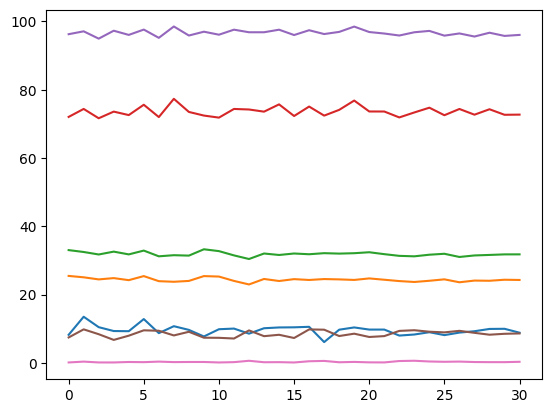

In [13]:
plt.plot(y_result)


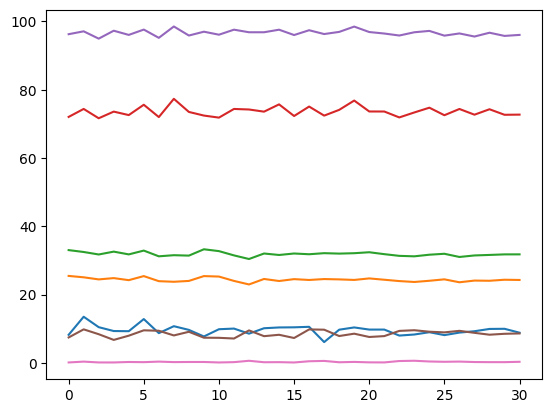

In [14]:
plt.plot(y_pred)